# Rhigh & Rlow model (Moscibrodzka+16)

## Check the data

In [32]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/f05_b1/inc90/BHOSS_CODE"
data = "f05_b1_sig1_i90_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A0_115.dat"
#data = "Rh40_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_SANEA93M_132.dat"
#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT_old/BHOSS_CODE"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=2)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 5
time: 9184.666192 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.000000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [  43.   86.  230.  345. 1360.]
All-freq image is included (3rd column in image data): False
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 0.0 0.00151415
Total flux = 2.002558 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 5
time: 9003.597816 Rg/c, inclination: 10.000000 deg, phi: 0.000000 deg, BH spin: 0.500000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [  43.   86.  230.  345. 1360.]
All-freq image is included (3rd column in image data): False
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 0.0 9.49303e-05
Total flux = 1.922476 Jy at 43 GHz
722:53:59.289 - Start Program


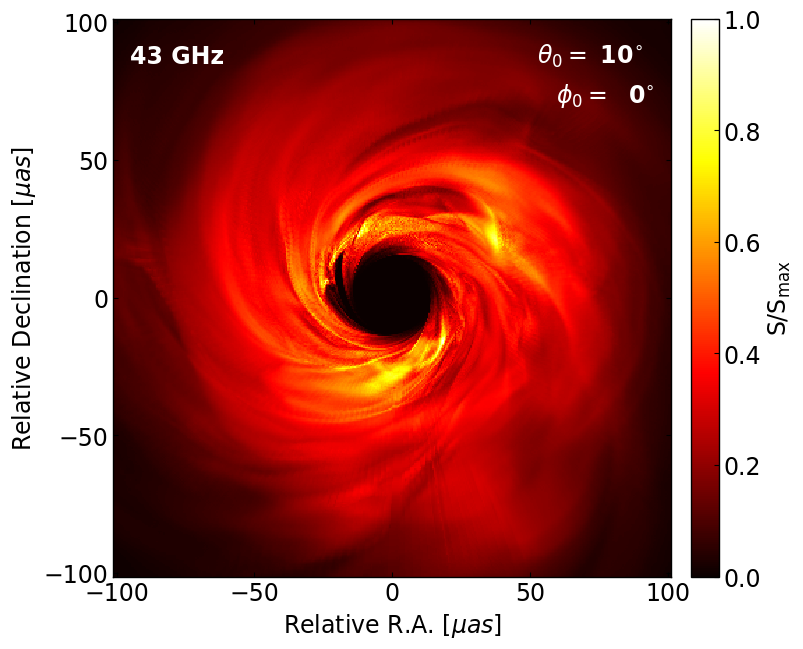

In [5]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

## Check Average Flux

In [1]:
import os
import numpy as np

#find average flux
def bhoss_avg(Te_model,sig,inclination,phi0,model_name, ifreq=2):

    note=""
    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "MADS41A93"):
        model_str = "bhoss_MA93"
        ind_start = 96
        ind_end = 195
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    elif (model_name == "SANEA05"):
        model_str = "bhoss_SA05"
        ind_start=900
        ind_end = 999
        note="192_"
    elif (model_name == "SANEA0"):
        model_str = "bhoss_SA0"
        ind_start=640
        ind_end = 739
    else:
        print("no model")
        return
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Te_model,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    
    print("ifreq=%d: Should be checked if it is the correct freqency."%ifreq)
    for image_ind in range(ind_start,ind_end+1):
        data_name="%s_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%s%d.dat" \
        %(Te_model,sig,inclination,phi0,model_name,note,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        #ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, ifreq+2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+Te_model,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [2]:
ind,time,z_tot,dscale = bhoss_avg("f05_b1",1,10,0,"MADS41A0", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/f05_b1/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
97, flux: 2.567460 at 9004.234232
98, flux: 2.499695 at 9014.746059
99, flux: 2.456418 at 9023.505435
100, flux: 2.382328 at 9034.016452
101, flux: 2.339726 at 9044.529609
102, flux: 2.315303 at 9053.290056
103, flux: 2.234744 at 9063.802536
104, flux: 2.187438 at 9074.314016
105, flux: 2.190074 at 9084.823874
106, flux: 2.236396 at 9093.581252
107, flux: 2.208957 at 9104.090482
108, flux: 2.161736 at 9114.601360
109, flux: 2.179025 at 9123.359993
110, flux: 2.210190 at 9133.870253
111, flux: 2.201862 at 9144.379583
112, flux: 2.197836 at 9154.889223
113, flux: 2.191915 at 9163.648327
114, flux: 2.171646 at 9174.157990
115, flux: 2.117159 at 9184.666192
116, flux: 2.110866 at 9193.424046
117, flux: 2.132762 at 9203.933544
118, flux: 2.168790 at 9214.444133
119, flux: 2.230520 at 9224.955775
120, flux: 2.268967 at 9233.717169
121, flux: 2.305202

In [3]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/f05_b1/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [4]:
import numpy as np
import os
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/f05_b1/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.062731 Jy, the density scale = 1.590000e-18


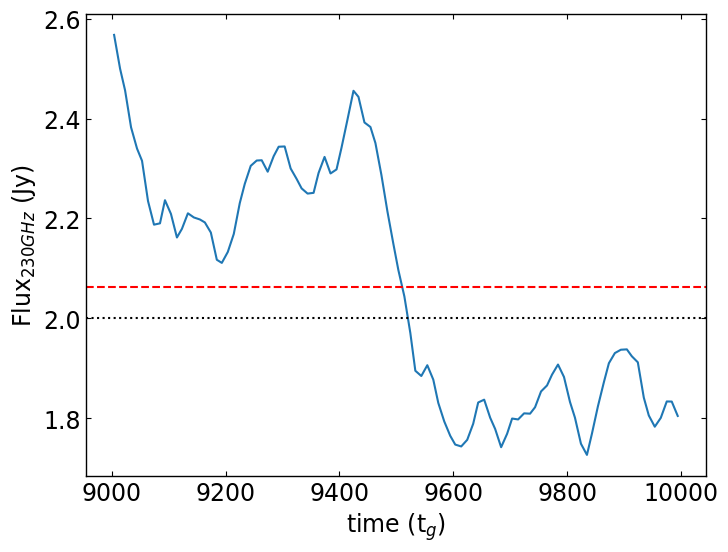

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [6]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.567460 Jy at 9004.234232
98:: 2.499695 Jy at 9014.746059
99:: 2.456418 Jy at 9023.505435
100:: 2.382328 Jy at 9034.016452
101:: 2.339726 Jy at 9044.529609
102:: 2.315303 Jy at 9053.290056
103:: 2.234744 Jy at 9063.802536
104:: 2.187438 Jy at 9074.314016
105:: 2.190074 Jy at 9084.823874
106:: 2.236396 Jy at 9093.581252
107:: 2.208957 Jy at 9104.090482
108:: 2.161736 Jy at 9114.601360
109:: 2.179025 Jy at 9123.359993
110:: 2.210190 Jy at 9133.870253
111:: 2.201862 Jy at 9144.379583
112:: 2.197836 Jy at 9154.889223
113:: 2.191915 Jy at 9163.648327
114:: 2.171646 Jy at 9174.157990
115:: 2.117159 Jy at 9184.666192
116:: 2.110866 Jy at 9193.424046
117:: 2.132762 Jy at 9203.933544
118:: 2.168790 Jy at 9214.444133
119:: 2.230520 Jy at 9224.955775
120:: 2.268967 Jy at 9233.717169
121:: 2.305202 Jy at 9244.228854
122:: 2.315866 Jy at 9254.740756
123:: 2.316423 Jy at 9263.502558
124:: 2.293480 Jy at 9274.015079
125:: 2.324553 Jy at 9284.527261
126:: 2.343496 Jy at 9293.287130
127:: 2.34403

In [7]:
ind,time,z_tot,dscale = bhoss_avg("f05_b1",1,50,0,"MADS41A0", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/f05_b1/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
97, flux: 2.683367 at 9004.234232
98, flux: 2.623475 at 9014.746059
99, flux: 2.574860 at 9023.505435
100, flux: 2.501467 at 9034.016452
101, flux: 2.451113 at 9044.529609
102, flux: 2.422131 at 9053.290056
103, flux: 2.323174 at 9063.802536
104, flux: 2.236462 at 9074.314016
105, flux: 2.200830 at 9084.823874
106, flux: 2.249304 at 9093.581252
107, flux: 2.253185 at 9104.090482
108, flux: 2.165599 at 9114.601360
109, flux: 2.152103 at 9123.359993
110, flux: 2.146833 at 9133.870253
111, flux: 2.138936 at 9144.379583
112, flux: 2.135323 at 9154.889223
113, flux: 2.131216 at 9163.648327
114, flux: 2.101704 at 9174.157990
115, flux: 2.020657 at 9184.666192
116, flux: 1.987756 at 9193.424046
117, flux: 2.005669 at 9203.933544
118, flux: 2.040177 at 9214.444133
119, flux: 2.092299 at 9224.955775
120, flux: 2.142692 at 9233.717169
121, flux: 2.190052

In [8]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/f05_b1/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [9]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/f05_b1/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.040404 Jy, the density scale = 1.340000e-18


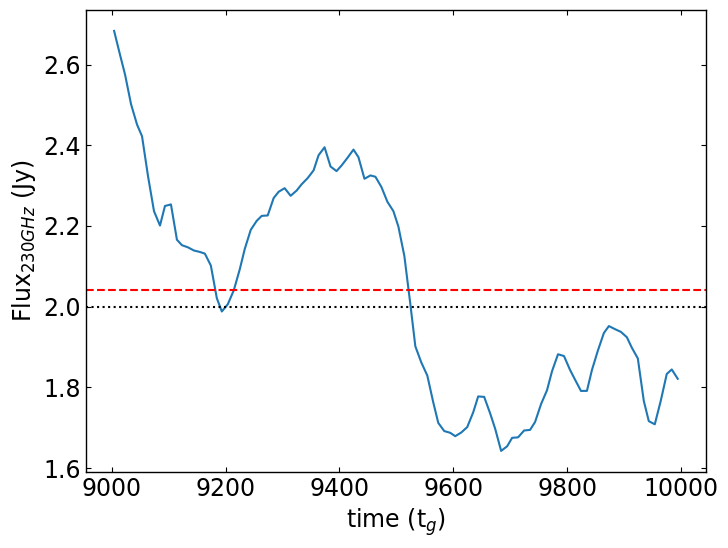

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [11]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.683367 Jy at 9004.234232
98:: 2.623475 Jy at 9014.746059
99:: 2.574860 Jy at 9023.505435
100:: 2.501467 Jy at 9034.016452
101:: 2.451113 Jy at 9044.529609
102:: 2.422131 Jy at 9053.290056
103:: 2.323174 Jy at 9063.802536
104:: 2.236462 Jy at 9074.314016
105:: 2.200830 Jy at 9084.823874
106:: 2.249304 Jy at 9093.581252
107:: 2.253185 Jy at 9104.090482
108:: 2.165599 Jy at 9114.601360
109:: 2.152103 Jy at 9123.359993
110:: 2.146833 Jy at 9133.870253
111:: 2.138936 Jy at 9144.379583
112:: 2.135323 Jy at 9154.889223
113:: 2.131216 Jy at 9163.648327
114:: 2.101704 Jy at 9174.157990
115:: 2.020657 Jy at 9184.666192
116:: 1.987756 Jy at 9193.424046
117:: 2.005669 Jy at 9203.933544
118:: 2.040177 Jy at 9214.444133
119:: 2.092299 Jy at 9224.955775
120:: 2.142692 Jy at 9233.717169
121:: 2.190052 Jy at 9244.228854
122:: 2.212525 Jy at 9254.740756
123:: 2.224763 Jy at 9263.502558
124:: 2.225830 Jy at 9274.015079
125:: 2.269045 Jy at 9284.527261
126:: 2.284554 Jy at 9293.287130
127:: 2.29341

In [12]:
ind,time,z_tot,dscale = bhoss_avg("f05_b1",1,90,0,"MADS41A0", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/f05_b1/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
97, flux: 2.758952 at 9004.234232
98, flux: 2.751169 at 9014.746059
99, flux: 2.684843 at 9023.505435
100, flux: 2.584005 at 9034.016452
101, flux: 2.497733 at 9044.529609
102, flux: 2.453880 at 9053.290056
103, flux: 2.345337 at 9063.802536
104, flux: 2.369343 at 9074.314016
105, flux: 2.193832 at 9084.823874
106, flux: 2.428405 at 9093.581252
107, flux: 2.417181 at 9104.090482
108, flux: 2.426988 at 9114.601360
109, flux: 2.404542 at 9123.359993
110, flux: 2.380624 at 9133.870253
111, flux: 2.475855 at 9144.379583
112, flux: 2.473912 at 9154.889223
113, flux: 2.507162 at 9163.648327
114, flux: 2.187590 at 9174.157990
115, flux: 2.002558 at 9184.666192
116, flux: 2.105455 at 9193.424046
117, flux: 2.249961 at 9203.933544
118, flux: 2.307134 at 9214.444133
119, flux: 2.392908 at 9224.955775
120, flux: 2.468671 at 9233.717169
121, flux: 2.507433

In [13]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/f05_b1/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [14]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/f05_b1/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.096123 Jy, the density scale = 1.200000e-18


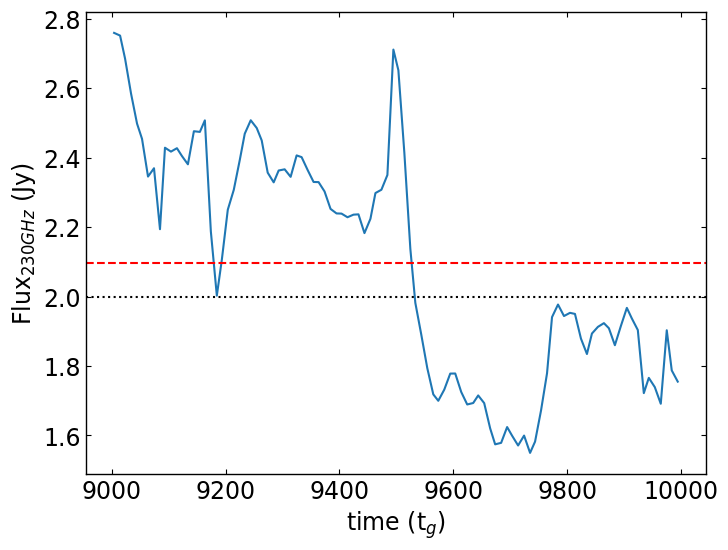

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [16]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.758952 Jy at 9004.234232
98:: 2.751169 Jy at 9014.746059
99:: 2.684843 Jy at 9023.505435
100:: 2.584005 Jy at 9034.016452
101:: 2.497733 Jy at 9044.529609
102:: 2.453880 Jy at 9053.290056
103:: 2.345337 Jy at 9063.802536
104:: 2.369343 Jy at 9074.314016
105:: 2.193832 Jy at 9084.823874
106:: 2.428405 Jy at 9093.581252
107:: 2.417181 Jy at 9104.090482
108:: 2.426988 Jy at 9114.601360
109:: 2.404542 Jy at 9123.359993
110:: 2.380624 Jy at 9133.870253
111:: 2.475855 Jy at 9144.379583
112:: 2.473912 Jy at 9154.889223
113:: 2.507162 Jy at 9163.648327
114:: 2.187590 Jy at 9174.157990
115:: 2.002558 Jy at 9184.666192
116:: 2.105455 Jy at 9193.424046
117:: 2.249961 Jy at 9203.933544
118:: 2.307134 Jy at 9214.444133
119:: 2.392908 Jy at 9224.955775
120:: 2.468671 Jy at 9233.717169
121:: 2.507433 Jy at 9244.228854
122:: 2.485121 Jy at 9254.740756
123:: 2.449346 Jy at 9263.502558
124:: 2.356624 Jy at 9274.015079
125:: 2.328705 Jy at 9284.527261
126:: 2.362787 Jy at 9293.287130
127:: 2.36622